# MNIST dataset

![](https://www.tensorflow.org/images/MNIST.png)

- 손으로 쓴 숫자(0~9) 데이터셋
- Yann Lecun이 만든 딥러닝 연구용 벤치마크 데이터 (http://yann.lecun.com/exdb/mnist/)
- 총 70,000건의 데이터


### Size
- input: 28 x 28 greyscale image
- output: 0~9 numbers

### Representation
![](https://www.tensorflow.org/versions/r0.12/images/MNIST-Matrix.png)
range between 0 and 1, flatten and converted to 1d np array of 784 features

#### references
- https://www.tensorflow.org/get_started/mnist/beginners
- https://www.tensorflow.org/get_started/mnist/pros
- https://github.com/tensorflow/tensorflow/blob/r1.1/tensorflow/examples/tutorials/mnist/mnist_softmax.py

### Write-down your Tensorflow code: Basic steps

1. Load data
2. Convert inputs and labels into `tf.Tensor`
3. Create parameter variables `tf.Variable`
4. Build your model (`y=f(x)`)
5. Specify loss function (MSE, cross-entropy, ...)
6. Create optimizer and batch generator
7. Train the model by running optimizer

## 0. Import modules

In [1]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(0)

## 2. Load data: MNIST

In [2]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

In [3]:
# Prepare MNIST data.
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert from uint8 to float32 and
# normalize images value from [0, 255] to [0, 1].
# (uint8: Unsigned integer (0 to 255))
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32) / 255.
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) / 255.

# Flatten images to 1-D vector of 784 features (28*28).
x_train = tf.reshape(x_train, (-1, num_features)) # [b, 28, 28] => [b, 784]
x_test = tf.reshape(x_test, (-1, num_features))  # [b, 28, 28] => [b, 784]

print("Image Shape: {}".format(x_train[0].shape))
print("Label Shape: {}".format(y_train[0].shape))
print()
print("Training Set:   {} samples".format(len(x_train)))
print("Test Set:       {} samples".format(len(x_test)))

Image Shape: (784,)
Label Shape: ()

Training Set:   60000 samples
Test Set:       10000 samples


## 3. Create parameter variables
## 4. Build your model: Logistic Regression

In [4]:
# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.random.uniform([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.random.uniform([num_classes]), name="bias")

# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

## 5. Specify Loss function

In [5]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

## 6. Create Optimizer and Batch Generator

In [6]:
# Parameters for Model Training
learning_rate = 0.1
batch_size = 256
epochs = 10

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Use tf.data API to batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
training_batch = train_data.batch(batch_size).repeat(epochs)

## (option) Test Metric: Accuracy

In [7]:
# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 7. Train the model by running optimizer

In [8]:
# Interval for showing the training status.
display_step = 500

# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(training_batch, 1):
    # Run the optimization to update W and b values.
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)

    # Compute gradients.
    trainable_variables = [W, b]
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %.4f, accuracy: %.4f" % (step, loss, acc))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
step: 500, loss: 1256.0277, accuracy: 0.7305
step: 1000, loss: 997.1124, accuracy: 0.7891
step: 1500, loss: 1178.2102, accuracy: 0.7734
step: 2000, loss: 1153.0339, accuracy: 0.7734


## Test phase

In [9]:
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.744600


##  Visualize the prediction results

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

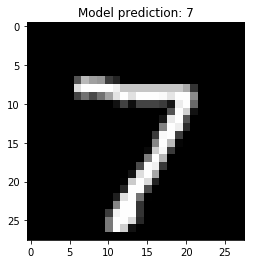

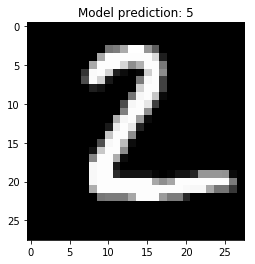

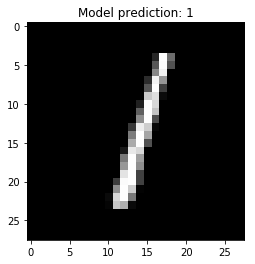

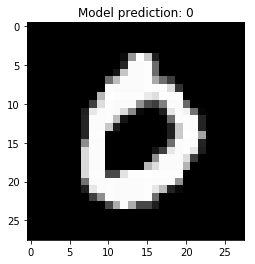

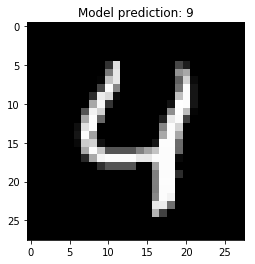

In [12]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    title = "Model prediction: %i" % np.argmax(predictions.numpy()[i])
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.title(title)
    plt.show()

# Use High-level API based on Keras
- `tf.keras.Sequential`
- `tf.keras.layers`

In [13]:
# Resets graph identifiers.
tf.keras.backend.reset_uids()

In [14]:
from tensorflow.keras import layers, Sequential

# logistic_regression = layers.Dense(num_classes, activation='softmax') 
logistic_regression = Sequential([
    layers.Dense(num_classes, activation='softmax')])
logistic_regression.build(input_shape=(None, num_features))
logistic_regression.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Parameters for Model Training
learning_rate = 0.1
batch_size = 256
epochs = 10

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Use tf.data API to batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
training_batch = train_data.batch(batch_size).repeat(epochs)

In [16]:
# Interval for showing the training status.
display_step = 500

# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(training_batch, 1):
    # Run the optimization to update W and b values.
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)

    # Compute gradients.
    gradients = g.gradient(loss, logistic_regression.trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, logistic_regression.trainable_variables))
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %.4f, accuracy: %.4f" % (step, loss, acc))

step: 500, loss: 1464.2539, accuracy: 0.7148
step: 1000, loss: 1786.5090, accuracy: 0.6562
step: 1500, loss: 1461.6962, accuracy: 0.7070
step: 2000, loss: 1782.5737, accuracy: 0.6289


In [17]:
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.676500


### Summary: Write-down Tensorflow code step-by-step

1. Load data
2. Convert inputs and labels into `tf.Tensor`
3. Create parameter variables `tf.Variable`
  - (It will be unnecessary if you use `tf.keras.layers`)
4. Build your model (`y=f(x)`)
  - (It will be easier if you use `tf.keras.Sequential`)
5. Specify loss function (MSE, cross-entropy, ...)
6. Create optimizer and batch generator
7. Train the model by running optimizer